In [1]:
#AI Trainer for the Adjustments Project
#Config

#Define non-string fields
fieldHandling={}
fieldHandling.update({"Drawn":"Normalize"})
fieldHandling.update({"Undrawn":"Normalize"})
fieldHandling.update({"PD":"Clip"})
fieldHandling.update({"IsDefaulted":"Clip"})


In [2]:
#Load input data
import pandas as pd
import numpy as np

#Load data
df=pd.read_csv('SampleData.csv')
df.head(10)

,AdjustmentType,AdjustmentName,AdjustedField,Drawn,Undrawn,PD,CustomerID,CustomerType,AccountType,Approach,RiskCategory,SubDivision,IsDefaulted,CountryCode,NewVal
0,Amend,Market Downturn,Drawn,833813,653127,0.48,CUST712035,Corporate,Loan,FOU,High,HSBC_CORP,0,US,0.0
1,Amend,STD downgrade credit card,AccountType,783306,404337,0.49,CUST981372,SME,Credit Card,ADV,Medium,HSBC_AP,1,US,Other
2,Amend,US STD downgrade,CustomerType,269063,249197,0.45,CUST450896,Retail,Credit Card,STD,Low,HSBC_CORP,1,US,Retail
3,Amend,German Retail Downturn,IsDefaulted,197042,763481,0.68,CUST192654,Retail,Current,STD,High,HSBC_IR,0,DE,1.0
4,Amend,US Corporate Crunch,Undrawn,338901,906903,0.71,CUST192654,Corporate,Savings,FOU,Low,HSBC_DEBTS,0,US,0.0
5,Amend,BREXIT_DEFAULTED,SubDivision,763060,15079,0.00,CUST563201,Corporate,Loan,FOU,Medium,HSBC_DEBTS,1,GB,HSBC_DEBTS
6,Amend,German Retail Downturn,IsDefaulted,993216,539722,0.66,CUST450896,Retail,Credit Card,STD,Medium,HSBC_DEBTS,0,DE,1.0
7,Amend,US STD downgrade,CustomerType,135310,523847,0.66,CUST359147,Retail,Savings,STD,High,HSBC_US,0,US,Retail
8,Amend,STD downgrade credit card,AccountType,396575,666932,0.23,CUST192654,Corporate,Credit Card,STD,Medium,HSBC_DEBTS,0,DE,Other
9,Amend,BREXIT,AccountType,953270,742436,0.78,CUST238947,SME,Mortgage,STD,Low,HSBC_CORP,0,GB,Other


In [3]:
#Stage 1: Split the data into onehot encoded and non-onehot encoded dataframes - turn NewVal into token number

#Build list of all string columns in the dataframe
string_columns=[]
other_columns=[]
for col in df.columns:
    if df[col].dtype=='object' and col!="NewVal":
        string_columns.append(col)
    else:
        other_columns.append(col)

#Detach other_columns from df
df_other=df[other_columns]
df.drop(other_columns, axis=1, inplace=True)

#Create a dictionary to map the output labels to numbers
#Turn output labels into numbers
outputLabels=df_other["NewVal"].unique()
outputLabels=outputLabels.copy()
outputLabels.sort()
outputLabelsDict={}
for i in range(len(outputLabels)):
    outputLabelsDict[outputLabels[i]]=i

#Create inverse dictionary
outputLabelsInvDict={}
for i in range(len(outputLabels)):
    outputLabelsInvDict[i]=outputLabels[i]

#Turn NewVal into numbers
df_other["NewVal"]=df_other["NewVal"].map(outputLabelsDict)

outputLabelsDict

C:\Users\simon\AppData\Local\Temp\ipykernel_63948\3077147639.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other["NewVal"]=df_other["NewVal"].map(outputLabelsDict)


{'0.0': 0,
 '1.0': 1,
 'Debt Recovery': 2,
 'HSBC_DEBTS': 3,
 'Other': 4,
 'Retail': 5}

In [4]:
#Test code using SKLearn OneHotEncoder***********************************************************
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoded_array = encoder.fit_transform(df)
encoded_array

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names(df.columns))
encoded_df
#df
#encoded_df.columns.to_list()

#encoder.get_feature_names(df.columns)

#encoded_df.to_csv("encoded_df.csv")

# # Function to find the encoded column name
# def find_encoded_column_name(encoder, column_index, field_value):
#     column_categories = encoder.categories_[column_index]
#     value_index = np.where(column_categories == field_value)[0][0]
#     encoded_column_name = f'x{column_index}_{value_index}_{field_value}'
#     return encoded_column_name

# # Example: Find the encoded column name for 'red' in the second column (index 1)
# encoded_column_name = find_encoded_column_name(encoder, 1, 'red')
# print(encoded_column_name)  # Output: x1_1_red



#original_df

c:\pythonenvs\pyTorchCUDA\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,AdjustmentName_STD downgrade credit card,AdjustmentName_US Corporate Crunch,AdjustmentName_US STD downgrade,AdjustedField_AccountType,...,RiskCategory_Medium,SubDivision_HSBC_AP,SubDivision_HSBC_CORP,SubDivision_HSBC_DEBTS,SubDivision_HSBC_IR,SubDivision_HSBC_UK,SubDivision_HSBC_US,CountryCode_DE,CountryCode_GB,CountryCode_US
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14824,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14825,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14826,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [5]:
#Detach the NewVal column and onehot encode it!
labels=df_other["NewVal"]
df_other=df_other.drop(columns=["NewVal"])

labelF=pd.get_dummies(labels)
labelF


,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
14823,0,0,0,1,0,0
14824,1,0,0,0,0,0
14825,0,0,0,1,0,0
14826,0,0,1,0,0,0


In [6]:
#Stage 2: Normalize all numeric values
#Normalize the dataframe

#Statistical sampling
#Get min max for a column
def GetMinMax(col):
    return float(col.min()), float(col.max())

def Normalize(col, min, max):
    return (col-min)/(max-min)*2-1

#Get metrics for non-string fields
fieldMetrics={}
for col in fieldHandling.keys():

    #Get field haldning type
    fieldHandlingType=fieldHandling[col]
    if fieldHandlingType=="Normalize":
        fieldMetrics.update({col:GetMinMax(df_other[col])})
    else:
        fieldMetrics.update({col:[0.1,1.0]})

fieldHandling

#Copy df_other, normalize the copy
df_other_normalized=df_other.copy()
for col in fieldHandling.keys():
    if fieldHandling[col]=="Normalize":
        df_other_normalized[col]=Normalize(df_other_normalized[col], fieldMetrics[col][0], fieldMetrics[col][1])
    elif fieldHandling[col]=="Clip":
        df_other_normalized[col]=df_other_normalized[col].clip(0,1)

#df_other_normalized


#build the final dataframe
df_normalized=pd.concat([df_other_normalized, encoded_df], axis=1)
df_normalized


,Drawn,Undrawn,PD,IsDefaulted,AdjustmentType_Amend,AdjustmentName_BREXIT,AdjustmentName_BREXIT_DEFAULTED,AdjustmentName_Defaulting Cleanup,AdjustmentName_German Retail Downturn,AdjustmentName_Market Downturn,...,RiskCategory_Medium,SubDivision_HSBC_AP,SubDivision_HSBC_CORP,SubDivision_HSBC_DEBTS,SubDivision_HSBC_IR,SubDivision_HSBC_UK,SubDivision_HSBC_US,CountryCode_DE,CountryCode_GB,CountryCode_US
0,0.668466,0.306611,0.48,0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.567396,-0.191118,0.49,1,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.461656,-0.501491,0.45,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.605777,0.527385,0.68,0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.321903,0.814314,0.71,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14823,-0.557349,0.936455,0.17,1,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
14824,-0.790873,0.055742,0.73,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
14825,0.882645,-0.164120,0.98,1,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14826,0.674657,-0.491662,0.11,1,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
print(len(df_normalized))
print(len(labelF))

14828
14828


In [8]:
#Turn the pandas dataframe into a numpy array, split out the label and then break into sets
import tensorflow as tf

#turn df_normalized into a normal array
data=df_normalized.values

#Get all columns except the output column
X=data[:,1:]

#Get the output column
data=labelF.values
y=data[:,:]


from sklearn.model_selection import train_test_split
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)




In [52]:
print(len(X))
print(len(y))

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


20000
20000
16000
4000
16000
4000


In [9]:
#Build model parameterized so we can do a grid-search on hyperparameters
from keras.wrappers.scikit_learn import KerasClassifier

def CreateModel(neurons=200, dropout=0.2,layers=3):

    #------------------PARAMETERS------------------
    num_classes=len(labelF.columns)  #Fix this so it gets inferred from the data in future
    #totalepochs=80

    #Simple feed-forward model. No U-nets or anything fancy
    ann = tf.keras.models.Sequential()

    #Variable number of layers
    for i in range(layers):
        ann.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
        ann.add(tf.keras.layers.Dropout(dropout))
    
    ann.add(tf.keras.layers.Dense(units=num_classes, activation='sigmoid'))

    # ann.add(tf.keras.layers.Flatten())
    # ann.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


    #Compile!
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    ann.build(input_shape=(None, X_train.shape[1]))
    #ann.summary()
    return ann

model = KerasClassifier(build_fn=CreateModel, verbose=0)

param_grid = {
    'epochs': [1,2,4,8,16],
    'neurons': [50, 100, 200],
    "dropout":[0.05,0.1,0.2,0.4],
    "layers":[1,2,4]
}

C:\Users\simon\AppData\Local\Temp\ipykernel_63948\253505356.py:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=CreateModel, verbose=0)


In [12]:
#Train the MODEL!!!!!
#model.fit(X_train, y_train, batch_size = 32, epochs = 80)

#Perform hyperparameter search using GPU
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(X_train, y_train)
# print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

#Best score: 0.819375 using {'dropout': 0.05, 'epochs': 8, 'layers': 1, 'neurons': 0}
model=CreateModel(neurons=50, dropout=0.05,layers=1)
model.fit(X_train, y_train, batch_size = 32, epochs = 2)



Epoch 1/2
371/371 [==============================] - 1s 673us/step - loss: 0.1675 - accuracy: 0.8892
Epoch 2/2
371/371 [==============================] - 0s 653us/step - loss: 0.0093 - accuracy: 1.0000


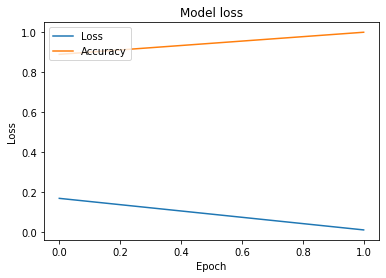

In [13]:
#Plot the loss and accuracy
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Accuracy'], loc='upper left')
plt.show()



In [14]:
#Validate the model against the test set
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

#Get the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


93/93 [==============================] - 0s 464us/step


1.0

In [15]:
#Weightwatcher
import weightwatcher as ww
watcher = ww.WeightWatcher(model=model)
results = watcher.analyze()
results



,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,rf,sigma,spectral_norm,stable_rank,status,sv_max,warning,weak_rank_loss,xmax,xmin
0,0,dense_4,0.098386,50,55,1.1,1.8145,2.199018,0.771611,True,...,1,0.156751,16.28125,6.695312,success,4.035156,over-trained,0,16.28125,0.642578


In [69]:
#Save model (Tensorflow)
model.save('Models/AdjustmentValues/model.h5')

outputLabelsInvDict

# #Save the inverse labels dictionary as json to model folder
import json
with open('Models/AdjustmentValues/softmaxlkp.json', 'w') as fp:
    json.dump(outputLabelsInvDict, fp)

#Writing df_normalized column names to JSON
import json
with open('Models/AdjustmentValues/in_columnnames.json', 'w') as fp:
    json.dump(list(df_normalized.columns), fp)

#Write fieldhandling
import json
with open('Models/AdjustmentValues/in_numericfield.json', 'w') as fp:
    json.dump(fieldHandling, fp)

#Write fieldmetrics
import json
with open('Models/AdjustmentValues/in_fieldmetrics.json', 'w') as fp:
    json.dump(fieldMetrics, fp)

